<a href="https://colab.research.google.com/github/ashwinidverma/AD-Classifier-/blob/main/OASIS_AD_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
##import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import lime
#from lime import lime_tabular
#shap.initjs()

In [90]:
# prompt: lode data.xlsx

import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/drive/MyDrive/Socital_403_2024/ML_Model/Final_Data/Oasis_Data.xlsx')

# Print the DataFrame
print(df.shape)


(586, 11)


In [91]:
df=df.dropna()
df['Target'].count()

358

In [92]:
df['Target'].value_counts()

,count
Target,
0.0,218
1.0,101
2.0,39


In [93]:
# prompt: train a randomforest classifier usinf M/F,Hand,Age,Educ,SES,MMSE of df as feature and CDR as traget

from sklearn.ensemble import RandomForestClassifier
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
df['Target'] = df['Target'].replace({0: 0, 1: 1, 2 :1})

<ipython-input-93-098d961d99c8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})


In [85]:
df= df[['Sex',  'Age', 'Educ', 'MMSE','eTIV','nWBV','ASF','Target',]]

KeyError: "['Target'] not in index"

In [87]:
df=df.dropna()
print(df.shape)

(99, 7)


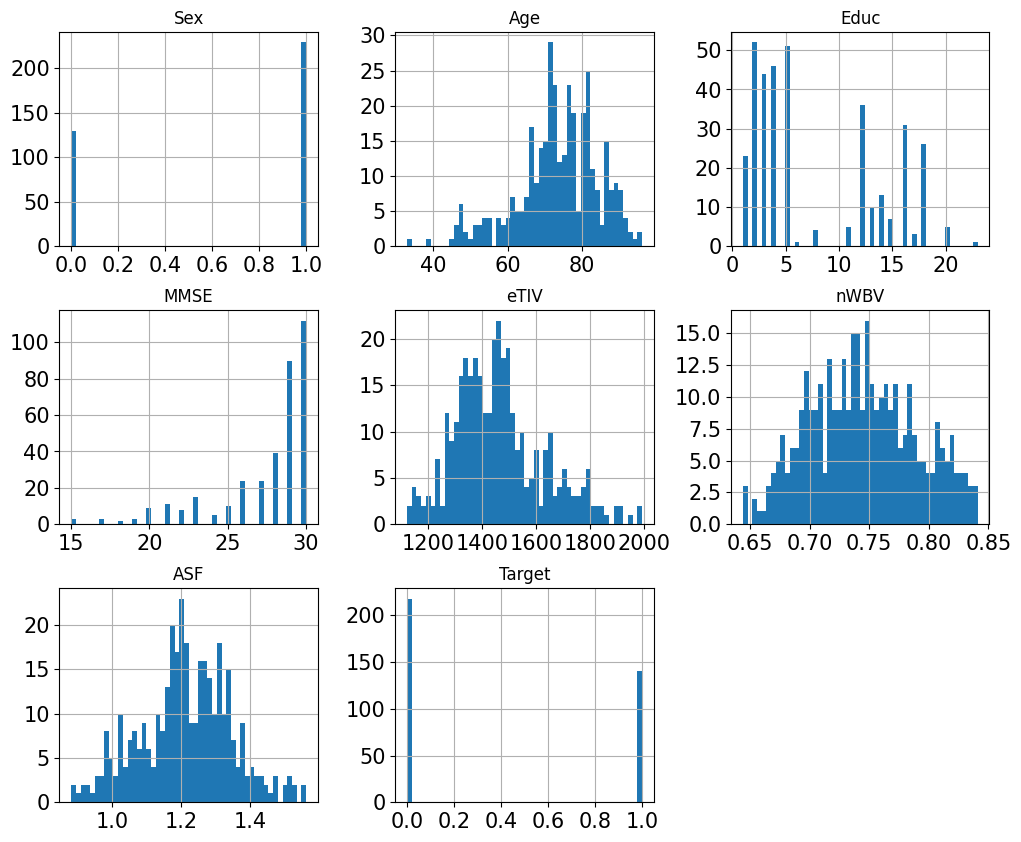

In [94]:
df[['Sex',  'Age', 'Educ',  'MMSE','eTIV','nWBV','ASF','Target',]].hist(figsize=(12, 10), bins=50, xlabelsize=15, ylabelsize=15)
plt.show()

In [95]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # 1. Load and Preprocess Data
# # Using Iris dataset as an example

features = ['Sex',  'Age', 'Educ','eTIV','nWBV','ASF','MMSE']
target = 'Target'

X = df[features]
y = df[target]
# # Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
cor = df[['Target','Sex',  'Age', 'Educ',  'MMSE','eTIV','nWBV','ASF']]

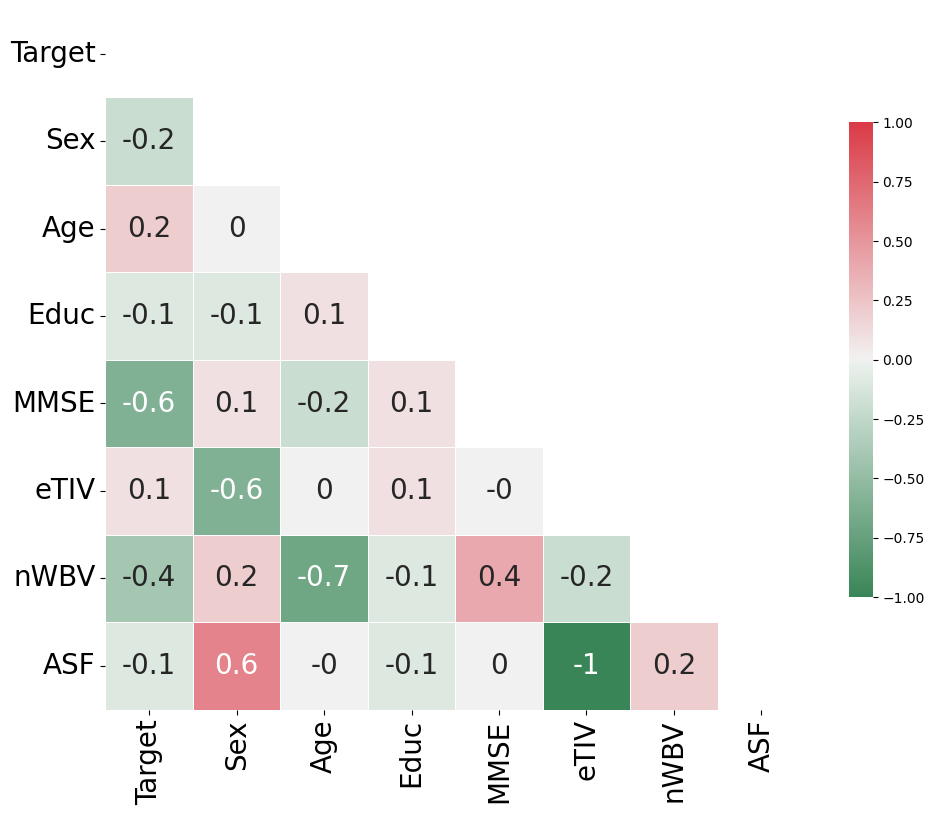

In [97]:
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

In [98]:

# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth =8,min_samples_split =10,random_state=42,)



# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88        37
         1.0       0.93      0.77      0.84        35

    accuracy                           0.86        72
   macro avg       0.87      0.86      0.86        72
weighted avg       0.87      0.86      0.86        72

Confusion Matrix:
[[35  2]
 [ 8 27]]
Accuracy: 0.8611111111111112


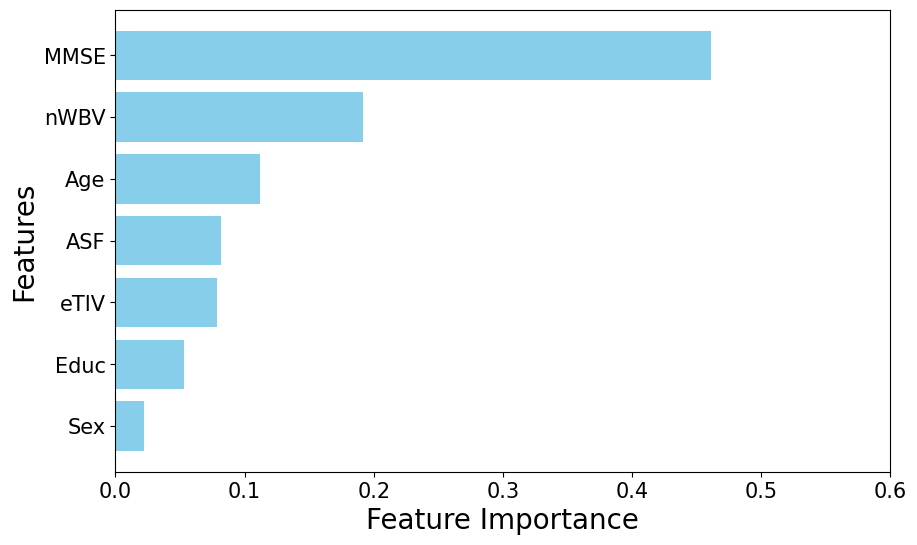

In [99]:
# Get feature importances and sort them
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Sort in descending order

# Create a DataFrame for better visualization
sorted_features = pd.DataFrame({
    'Feature': np.array(X_train.columns)[sorted_indices],
    'Importance': importances[sorted_indices]
})

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'], sorted_features['Importance'], color="skyblue")
plt.xlabel('Feature Importance',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,0.6)
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

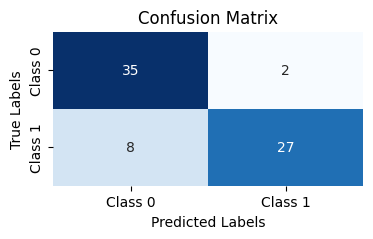

In [100]:
plt.figure(figsize=(4, 2), facecolor='white')  # Ensure figure background is white
ax = plt.gca()
ax.set_facecolor('white')  # Set the axis background to white as well

# Plot heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [101]:
import time
start = time.time()
MAE_Test =[]
MAE_Train =[]
Mean_Score=[]
Feature_import=[]
X_TRAIN=[]
X_TEST=[]
Y_TRAIN=[]
Y_TEST=[]
Y_PRE = []
for a in range(1,100):

    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = a)
    #print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
    clf = RandomForestClassifier(n_estimators=100,max_depth =8,min_samples_split =10,random_state=a)
    clf.fit(X_train, y_train)
    score_rr = clf.score(X_test,y_test)

    # mse = mean_squared_error(y_test, clf.predict(X_test))
    # ame = mean_absolute_error(y_test, clf.predict(X_test))
    # ame_train = mean_absolute_error(y_train, clf.predict(X_train))
    y_predict = clf.predict(X_train)
    # X_TRAIN.append(X_train)
    # X_TEST.append(X_test)
    # Y_TRAIN.append(y_test)
    # Y_TEST.append(y_train)
    # Y_PRE.append(y_predict)
    # MAE_Test.append(ame)
    # MAE_Train.append(ame_train)
    Mean_Score.append(score_rr)
    feature_import = clf.feature_importances_
    FI_abs_value = dict(zip(X.columns, feature_import))
    Feature_import.append(FI_abs_value)


end = time.time()
print(end - start)


24.64648151397705


In [102]:

np.mean(Mean_Score)

0.8693883277216612

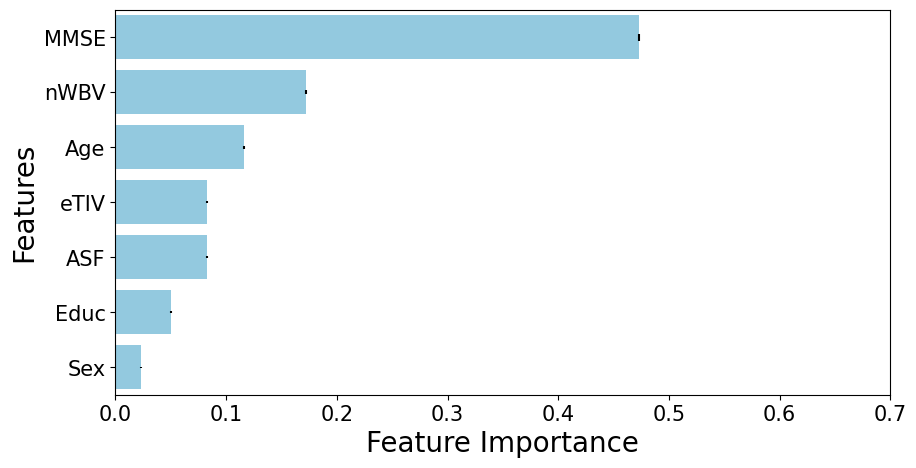

In [103]:
from statistics import mean
df = pd.DataFrame(Feature_import)
x=df.mean()
y=x.sort_values(ascending=False)
y=y.values.tolist()
Feature = X_train.columns

min =df.min()
max = df.max()
#x=x.sort_values(ascending=False)
#print(min,max)
dd = pd.DataFrame({'Features':Feature,'Value':x, 'Min': min, 'Max': max})
d=dd.sort_values(by=['Value'],ascending=False)

d['ymin'] = d.Value - d.Min
d['ymax'] = d.Max - d.Value
yerr = d[['ymin', 'ymax']].T.to_numpy()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Value',y='Features', data=d, yerr=yerr,capsize=6,orient = 'h', ax=ax,color="skyblue")
#plt.title("Feature Importance", fontsize=20)
#plt.yticks(fontsize=15)

plt.xlim(0,0.7)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=0)
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.show()

